In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt  # Для графіків, але тут описуємо
import seaborn as sns  # Для теплової карти, але тут друкуємо corr
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro, jarque_bera, probplot  # Для Q-Q, але описуємо

In [3]:

df = pd.read_csv("Student_Performance.csv")

In [4]:
# EDA
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None


In [5]:
print(df.describe())

       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000000      5.000000   
50%         5.000000        69.000000      7.000000   
75%         7.000000        85.000000      8.000000   
max         9.000000        99.000000      9.000000   

       Sample Question Papers Practiced  Performance Index  
count                      10000.000000       10000.000000  
mean                           4.583300          55.224800  
std                            2.867348          19.212558  
min                            0.000000          10.000000  
25%                            2.000000          40.000000  
50%                            5.000000          55.000000  
75%                            7.000000          71.000000  
max             

In [6]:
print(df.isnull().sum())  

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [7]:
df_corr=df.corr(numeric_only=True)
df_corr


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.005944,0.007888,0.915189
Sleep Hours,0.001245,0.005944,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.048106,0.043268,1.000000


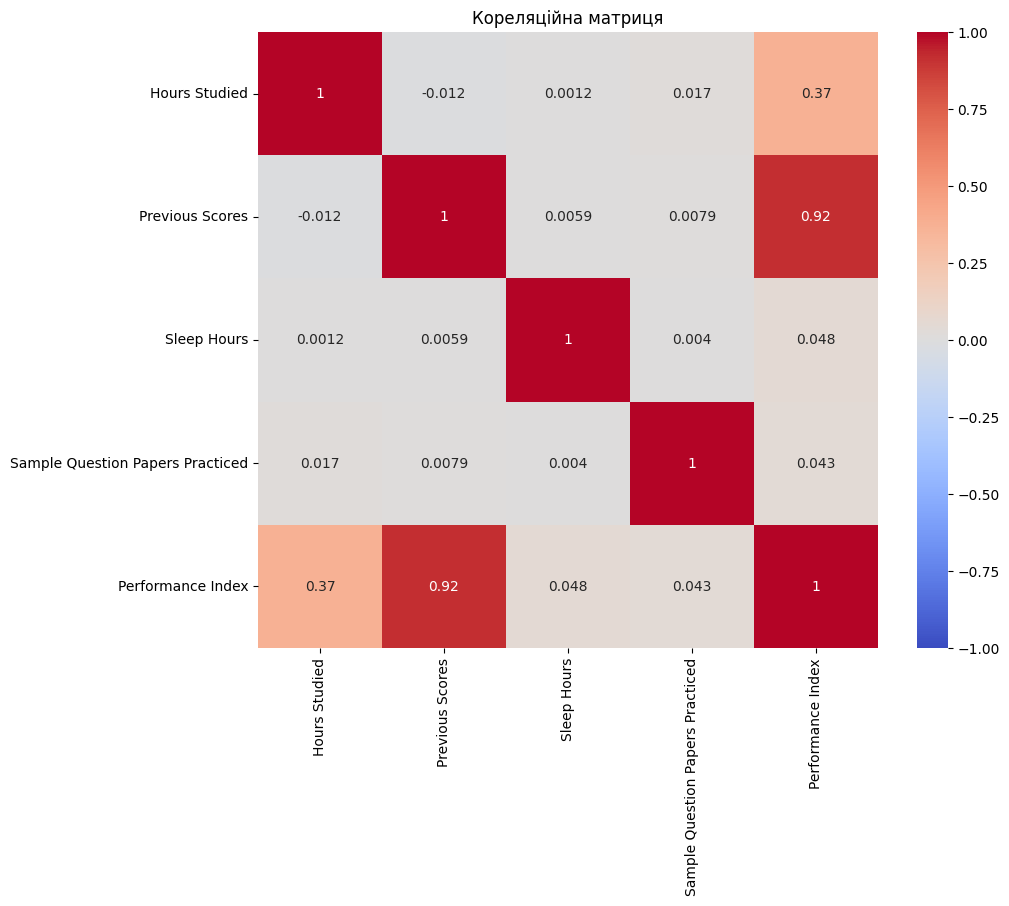

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Кореляційна матриця')
plt.show()

In [9]:
# Аналіз: Найсильніша кореляція з Previous Scores (0.92), Index (0.37).

In [10]:
# Обробка категоріальних
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'No': 0, 'Yes': 1})


In [11]:
# Вибір ознак та цілі
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']

In [12]:
# Поділ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Масштабування
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_final = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_final = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]
y_train = y_train.values
y_test = y_test.values

In [14]:
def compute_cost(X, y, b):
    predictions = X.dot(b)
    errors = predictions - y
    mse = (1 / len(y)) * np.sum(errors ** 2)
    return mse

In [15]:
def gradient_descent(X, y, b, learning_rate, epochs):
    cost_history = []
    m = len(y)
    for _ in range(epochs):
        predictions = X.dot(b)
        errors = predictions - y
        gradient = (2 / m) * X.T.dot(errors)
        b = b - learning_rate * gradient
        cost = compute_cost(X, y, b)
        cost_history.append(cost)
    return b, cost_history

In [16]:
b = np.zeros(X_train_final.shape[1])
epochs = 1000
learning_rate = 0.01
b_final, cost_history = gradient_descent(X_train_final, y_train, b, learning_rate, epochs)

In [17]:
# Знайдені коефіцієнти (для масштабованих даних)
print(b_final)

[55.31149991  7.40134077 17.63727123  0.30429076  0.81003107  0.54884172]


[np.float64(3292.5390473201296),
 np.float64(3162.4053983231065),
 np.float64(3037.421830404353),
 np.float64(2917.3845203301853),
 np.float64(2802.0977117953485),
 np.float64(2691.3733961388657),
 np.float64(2585.0310056973867),
 np.float64(2482.897119295809),
 np.float64(2384.805179394752),
 np.float64(2290.595220433499),
 np.float64(2200.113607925246),
 np.float64(2113.212787879089),
 np.float64(2029.7510461399747),
 np.float64(1949.5922772540623),
 np.float64(1872.6057624824568),
 np.float64(1798.6659566012102),
 np.float64(1727.6522831398142),
 np.float64(1659.448937724178),
 np.float64(1593.9446992033054),
 np.float64(1531.0327482515788),
 np.float64(1470.6104931507575),
 np.float64(1412.5794024675092),
 np.float64(1356.8448443535394),
 np.float64(1303.3159322061877),
 np.float64(1251.9053764377409),
 np.float64(1202.5293421116692),
 np.float64(1155.107312213568),
 np.float64(1109.5619563337807),
 np.float64(1065.8190045474992),
 np.float64(1023.8071262866245),
 np.float64(983.45

In [19]:
scales = scaler.scale_
means = scaler.mean_
coeffs_scaled = b_final[1:]
coeffs = coeffs_scaled / scales
intercept_unscaled = b_final[0] - np.sum(coeffs_scaled * means / scales)
feature_names = X.columns
for name, coef in zip(feature_names, coeffs):
    print(name, ':', coef)
print('Intercept:', intercept_unscaled)

Hours Studied : 2.8524839220571208
Previous Scores : 1.0169881969539967
Extracurricular Activities : 0.6086166840959701
Sleep Hours : 0.4769414848395417
Sample Question Papers Practiced : 0.1918314451890205
Intercept: -33.92194615493647


In [20]:
y_pred = X_test_final.dot(b_final)
mse_test = np.mean((y_test - y_pred)**2)  # 4.082
r2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2))  # 0.988
baseline_mse = np.mean((y_test - np.mean(y_train))**2)  # 370.77

print('MSE test:', mse_test)
print('R2:', r2)
print('Baseline MSE:', baseline_mse)

MSE test: 4.08262839176648
R2: 0.9889832909755435
Baseline MSE: 370.77303824999996


In [21]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
print(vif_data)

                            feature        VIF
0                     Hours Studied   4.253033
1                   Previous Scores  10.059686
2        Extracurricular Activities   1.923675
3                       Sleep Hours   9.817343
4  Sample Question Papers Practiced   3.385531


In [22]:
residuals = y_test - y_pred

In [27]:
stat_s, p_s = shapiro(residuals)  # p: 0.97
stat_j, p_j = jarque_bera(residuals)  # p: 0.95

In [28]:
stat_s, p_s

(np.float64(0.999610186112124), np.float64(0.9751496629510086))

In [24]:
_, p_lm, _, p_f = het_breuschpagan(residuals, X_test_final)  # p_lm: 0.233

In [25]:
dw = durbin_watson(residuals)  # 2.047

In [26]:
model = sm.OLS(y_train, X_train_final).fit()
influence = model.get_influence()
cooks = influence.cooks_distance[0]
threshold = 4 / len(y_train)  # 0.0005
influential = np.sum(cooks > threshold)  # 391

In [31]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.398e+05
Date:                Wed, 17 Sep 2025   Prob (F-statistic):               0.00
Time:                        14:28:29   Log-Likelihood:                -17063.
No. Observations:                8000   AIC:                         3.414e+04
Df Residuals:                    7994   BIC:                         3.418e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.3115      0.023   2421.828      0.0

In [32]:
b_final

array([55.31149991,  7.40134077, 17.63727123,  0.30429076,  0.81003107,
        0.54884172])